In [3]:
import random
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 18})

___
# Game Theory: Prisoner's Dilemma
The purpose of this small project is to demonstrate game theory by use of the classic *Prisoner's Dilemma*. Here we compare the effectiveness of multiple prisoner's dilemma strategies.

The different strategies are:
- Cooperator( ):  Always cooperate
- Defector( ):  Always defect
- TitForTatter( ):  Always play the opponents previous move
- Grudger( ):  Cooperate until the opponent defects once, then always defect
- Alternator( ):  Cooperate, defect, cooperate, defect....etc
- Extortionist( ):  Moved determined by a probability; probability determined by the outcome of the previous round

This program uses the __*lowest score wins*__ methodology (least years in prison).

### 1. Initialising Game and Player classes

In [4]:
class Game:
    """A class to hold the game matrix and to score a game accordingly."""

    def __init__(self, r=1, s=5, t=0, p=3):
        self.scores = {
            ('C', 'C'): (r, r),
            ('D', 'D'): (p, p),
            ('C', 'D'): (s, t),
            ('D', 'C'): (t, s),
        }

    def score(self, pair):
        """Returns the appropriate score (as a tuple) from the scores dictionary"""
        return self.scores[pair]

In [5]:
class Player:
    """This is an abstract base class, not intended to be used directly."""
    def __init__(self):
        """Initiates an empty history and 0 score for a player"""
        self.history = []
        self.score = 0

    def strategy(self, opponent):
        """This is a placeholder strategy."""
        return None

    def play(self, opponent):
        """This pits two players against each other."""
        self_move, opp_move = self.strategy(opponent), opponent.strategy(self)
        self.history.append(self_move)
        opponent.history.append(opp_move)
        return self_move, opp_move

### 2. Different strategy classes
Now we create multiple different Player classes, each utilising a different strategy

In [6]:
class Cooperator(Player):
    """A player who always cooperates"""
    def strategy(self, opponent):
        return "C"

    def __repr__(self):  # str method for class
        return "Cooperator"

In [7]:
class Defector(Player):
    """A player who always defects"""
    def strategy(self, opponent):
        return "D"

    def __repr__(self):  # str method for class
        return "Defector"

In [8]:
class TitForTatter(Player):
    """A player who starts by cooperating and then mimics previous move by opponent."""
    def strategy(self, opponent):
        if opponent.history:
            return opponent.history[-1]
        return "C"

    def __repr__(self):  # str method for class
        return "TitForTatter"

In [9]:
class Grudger(Player):
    """A player who starts by cooperating however will defect if at any point the
    opponent has defected."""
    def strategy(self, opponent):
        if "D" in opponent.history:
            return "D"
        return "C"

    def __repr__(self):  # str method for class
        return "Grudger"


In [10]:
class Alternator(Player):
    """A player who cooperates, then defects, then cooperates...etc"""
    def strategy(self, opponent):
        if len(self.history) % 2 == 0:
            return "C"
        else:
            return "D"

    def __repr__(self):  # str method for class
        return "Alternator"

In [11]:
class Extortionist(Player):
    """A very clever player whose move depends on which of the
    4 possible move pairs occured in the previous round.
    Inspired by Press and Dyson's 'Extort-2' strategy (referenced below)
    """
    def strategy(self, opponent):
        if self.history:
            if self.history[-1] == 'C':
                if opponent.history[-1] == 'C':
                    return 'C' if random.random() < (8 / 9) else 'D'
                else:
                    return 'C' if random.random() < (1 / 2) else 'D'
            else:
                if opponent.history[-1] == 'C':
                    return 'C' if random.random() < (1 / 3) else 'D'
            return 'D'
        return 'C'

    def __repr__(self):  # str method for class
        return "Extortionist"

### 3. Plot function

In [12]:
def make_plot(num_rounds, p1scores, p2scores, p1name, p2name):
    
    max_score = max(p1scores + p2scores)
    x_ax = [x for x in range(1, num_rounds+1)]
    
    fig = plt.figure(figsize=(12,7))
    ax = fig.add_subplot(111)
    fig.patch.set_facecolor('white')

    ax.plot(x_ax, p1scores, "#5AC1CE", linewidth=3, label=p1name)
    ax.plot(x_ax, p2scores, "#EA9262", linewidth=3, label=p2name)
    ax.set_xlabel('Round')
    ax.set_ylabel('Score')
        
    plt.rc('grid', linestyle='dotted', color='darkgray')
    
    ax.legend()
    plt.axis([1, num_rounds, 0, max_score])
    plt.grid()
    plt.show()

### 4. Main

In [13]:
def main(num_rounds, player1, player2, plot=False, watch=False):
    
    # altering these values will alter the number of "years" a prisoner will be sentenced to:
    game = Game(r=1, s=5, t=0, p=3)

    if watch:
        print(f"  Moves{str(player1):>20}   {str(player2)}")

    p1scores, p2scores = [], []  # Storing cumulative scores, purely for plot
        
    for ii in range(num_rounds):
        p1scores.append(player1.score)
        p2scores.append(player2.score)
        
        moves = player1.play(player2)
        scores = game.score(moves)
        player1.score += scores[0]
        player2.score += scores[1]
        
        if watch:
            print(f"{moves} {player1.score:>15} {player2.score:>{len(str(player2))+2}}")

    if plot:
        make_plot(num_rounds, p1scores, p2scores, str(player1), str(player2))
     
    print()
    print(f"{str(player1)+':':15} {player1.score}")
    print(f"{str(player2)+':':15} {player2.score}")
 
    if player1.score < player2.score:
        print(f"\n{str(player1)} is the winner!")
    elif player1.score > player2.score:
        print(f"\n{str(player2)} is the winner!")
    else:
        print("\nGame was a draw!")

### 4. Run
Alter the arguments in this main call to see the different strategies work against each other.

Notes:  
- __plot__ is set to False by default, you can opt to see a plot of the results by setting __plot=True__ in the call to main( )
- Setting __watch=True__ will print the moves and scores for each round (don't use for large __num_rounds__ values!)  
- You can also alter the "years in prison" a player will recieve, (see first comment in __main__ definition)

In [14]:
main(num_rounds=1000, player1=TitForTatter(), player2=Defector())


TitForTatter:   3002
Defector:       2997

Defector is the winner!


In [15]:
main(num_rounds=12, player1=Grudger(), player2=Extortionist(), watch=True)

  Moves             Grudger   Extortionist
('C', 'C')               1              1
('C', 'C')               2              2
('C', 'C')               3              3
('C', 'C')               4              4
('C', 'C')               5              5
('C', 'C')               6              6
('C', 'C')               7              7
('C', 'D')              12              7
('D', 'C')              12             12
('D', 'C')              12             17
('D', 'C')              12             22
('D', 'D')              15             25

Grudger:        15
Extortionist:   25

Grudger is the winner!


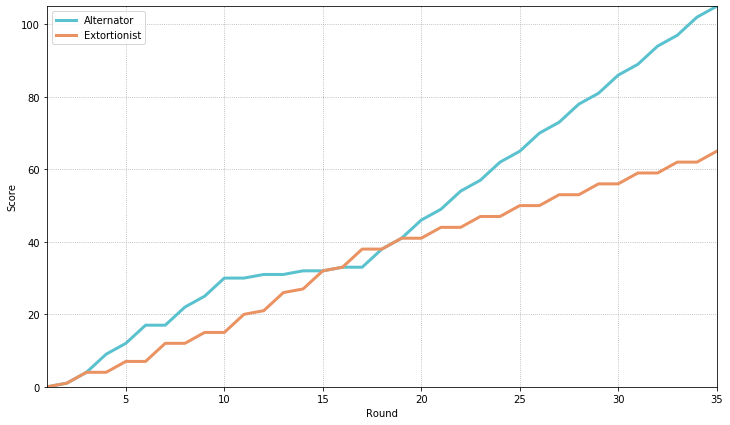


Alternator:     110
Extortionist:   65

Extortionist is the winner!


In [18]:
main(num_rounds=35, player1=Alternator(), player2=Extortionist(), plot=True)

___

### References:
- https://www.pnas.org/content/pnas/early/2012/05/16/1206569109.full.pdf
- https://github.com/Axelrod-Python/Axelrod
- https://www.researchgate.net/publication/235608431_Extortion_and_cooperation_in_the_Prisoner's_Dilemma

<img src="extortionist.png" style="width:400px;height:350px;float:left"/>